<a href="https://colab.research.google.com/github/Kunnalpatil/ML-Projects/blob/main/Electricity_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

# Convert object to numeric

In [ ]:

df["ForecastWindProduction"] = pd.to_numeric(df["ForecastWindProduction"], errors= 'coerce')
df["SystemLoadEA"] = pd.to_numeric(df["SystemLoadEA"], errors= 'coerce')
df["SMPEA"] = pd.to_numeric(df["SMPEA"], errors= 'coerce')
df["ORKTemperature"] = pd.to_numeric(df["ORKTemperature"], errors= 'coerce')
df["ORKWindspeed"] = pd.to_numeric(df["ORKWindspeed"], errors= 'coerce')
df["CO2Intensity"] = pd.to_numeric(df["CO2Intensity"], errors= 'coerce')
df["ActualWindProduction"] = pd.to_numeric(df["ActualWindProduction"], errors= 'coerce')
df["SystemLoadEP2"] = pd.to_numeric(df["SystemLoadEP2"], errors= 'coerce')
df["SMPEP2"] = pd.to_numeric(df["SMPEP2"], errors= 'coerce')

In [ ]:
df.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

#Null Value handeling

In [ ]:
df['ORKTemperature'].value_counts()

 9.0     3525
 10.0    3230
 8.0     3225
 11.0    3017
 7.0     2894
 12.0    2712
 6.0     2617
 5.0     2027
 13.0    2009
 15.0    1883
 14.0    1855
 4.0     1580
 16.0    1451
 3.0     1399
 17.0    1001
 2.0      953
 18.0     592
 1.0      531
 19.0     330
 0.0      214
 20.0     195
 21.0     135
-1.0      103
 22.0      75
 23.0      64
 24.0      43
-2.0       30
-3.0       14
 25.0      13
-4.0        2
Name: ORKTemperature, dtype: int64

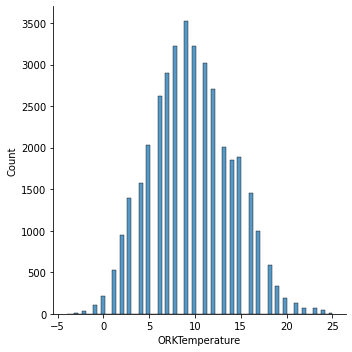

In [ ]:
sns.displot(df['ORKTemperature'])

Here we can see the **ORKTemperature** data is distributed normally so we will be using **mean**  of ORKTemperature to fill the **null values**

In [ ]:
df['ORKTemperature'].mean()

9.626368673612768

In [ ]:
df['ORKTemperature'].fillna(df['ORKTemperature'].mean(),inplace=True)

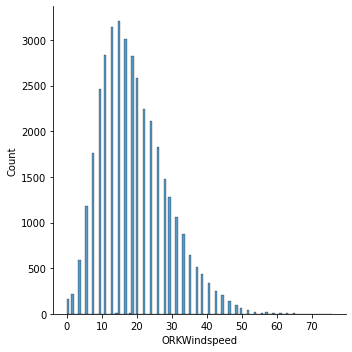

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


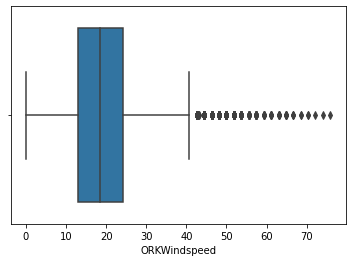

In [ ]:
sns.displot(df['ORKWindspeed'])
plt.show()
sns.boxplot(df['ORKWindspeed'])
plt.show()

In [ ]:
df['ORKWindspeed'].median()

18.5

In [ ]:
df['ORKWindspeed'].fillna(df['ORKWindspeed'].median(),inplace=True)

here we can see the **ORKWindspeed** data is Skewed right so I used **median** to fill nan values.

And then droping the rows with negligible null values

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

#Correlation Matrix

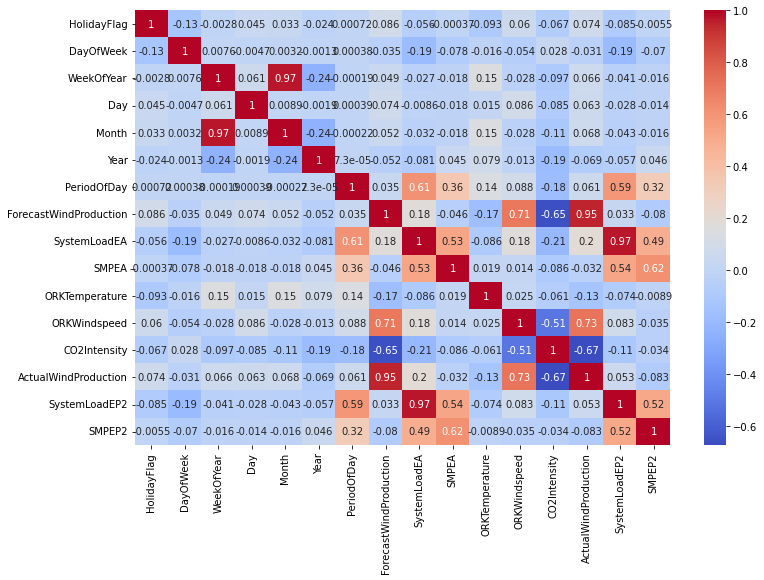

In [ ]:
correlations = df.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()


In [ ]:
corr = df.corr()
corr['SMPEP2'].sort_values(ascending=False)

SMPEP2                    1.000000
SMPEA                     0.617162
SystemLoadEP2             0.516835
SystemLoadEA              0.490817
PeriodOfDay               0.322985
Year                      0.046077
HolidayFlag              -0.005493
ORKTemperature           -0.008882
Day                      -0.013532
Month                    -0.015549
WeekOfYear               -0.016433
CO2Intensity             -0.033771
ORKWindspeed             -0.035105
DayOfWeek                -0.069707
ForecastWindProduction   -0.080125
ActualWindProduction     -0.083304
Name: SMPEP2, dtype: float64

## Columns selection and model building

In [ ]:
x = df[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]

y = df["SMPEP2"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**As this is the problem of regression, so here I will choose the Random Forest regression algorithm to train the electricity price prediction model**

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_test,y_test)

0.5502822381859283

In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf,x,y,cv = 5)

In [ ]:
cvs

array([0.43260259, 0.24598613, 0.39926857, 0.38379077, 0.38607613])

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.score(x_test,y_test)

0.40271377424848964

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lm_l = Lasso(alpha=.13)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-14.247672431992257

In [ ]:
lm_l.score(x_test,y_test)

0.402716149430828

# Removing  the  outliers and then training the model again to see the accuracy score

In [ ]:
df_train = df[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2","SMPEP2"]]


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_train))
print(z)

[[1.67403415 1.14590913 0.55246063 ... 0.43545496 0.74277682 0.27721982]
 [1.67403415 1.14590913 0.53679764 ... 0.53856717 0.96404702 0.279761  ]
 [1.67403415 1.14590913 0.5204589  ... 0.55443059 1.12889385 0.279761  ]
 ...
 [1.73381916 1.42573409 1.39843853 ... 1.16675024 0.38619963 0.91449361]
 [1.73381916 1.42573409 1.32741206 ... 1.1350234  0.26322562 0.38225564]
 [1.73381916 1.42573409 1.25443072 ... 1.32009661 0.31885446 0.82555199]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([   34,    35,    35, ..., 37982, 37991, 37992]), array([ 4,  4, 10, ...,  7,  4,  4]))


In [ ]:
df_train = df_train[(z < 3).all(axis=1)]

In [ ]:
X = df_train[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]

Y = df_train['SMPEP2']

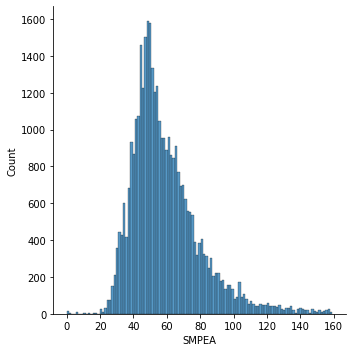

In [ ]:
sns.displot(X['SMPEA'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


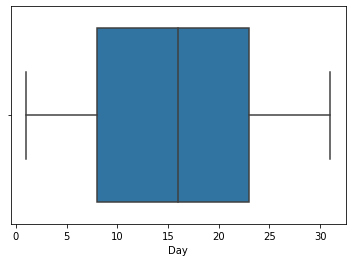

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


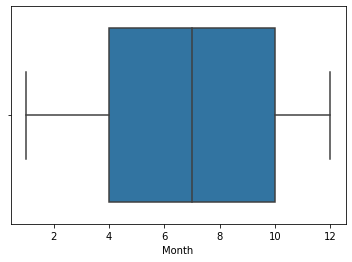

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


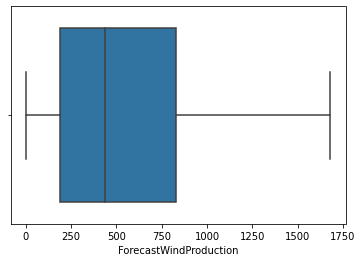

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


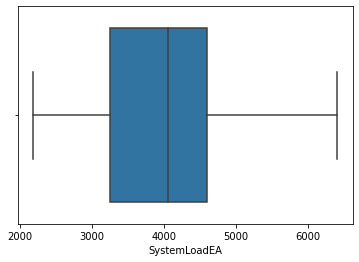

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


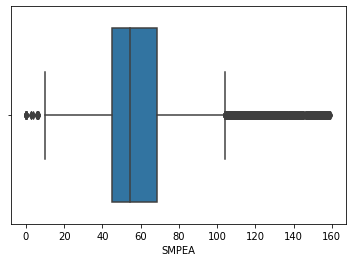

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


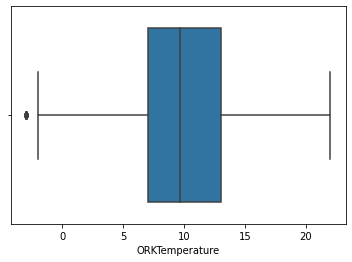

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


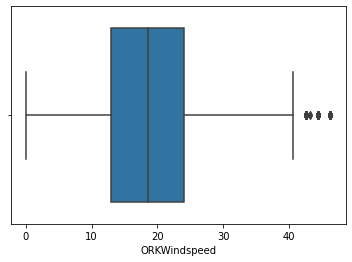

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


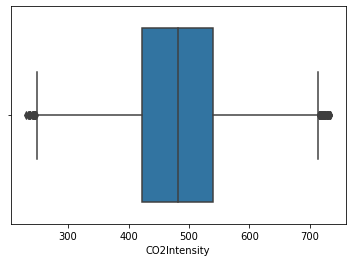

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


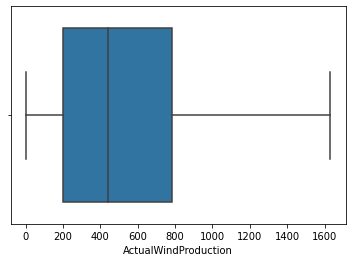

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


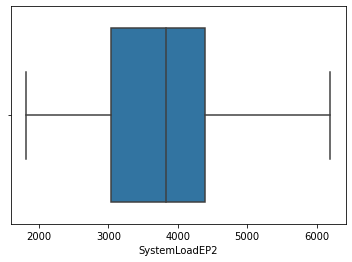

In [ ]:
for col in X.columns:
  sns.boxplot(X[col])
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
rf.score(X_test,Y_test)

0.7315334897255062

In [ ]:
(0.7315334897255062 - 0.5502822381859283)*100

18.1251251539578

# So after removing the outliers from the data we were able to achieve  **18%** more accurate predictions